In [1]:
import requests

In [2]:
url = "https://www.google.com/maps/search/comrez+akabane"

html_content = requests.get(url)

In [4]:
html_content.text

'<!DOCTYPE html><html itemscope="" itemtype="http://schema.org/Place" lang="ja"> <head>  <link href="/maps/_/js/k=maps.m.ja.axmaNDrFzv0.es5.O/m=sc2,per,mo,lp,ep,ti,ds,stx,dwi,enr,pwd,dw,plm,log,b/am=4ABA5AAp/rt=j/d=1/rs=ACT90oFRB4KLoV3_qhec3xvh-h8MnZyOrw?wli=m.uayt5qSJsuE.loadSv.O%3A%3Bm.OMhYnSp0_wk.mapcore.O%3A%3B" as="script" rel="preload" type="application/javascript" nonce="4D4EKdbceA1GG1l1eQr1GA">  <link href="/maps/preview/opensearch.xml?hl=ja" title="Google マップ" rel="search" type="application/opensearchdescription+xml"> <title> Google マップ </title> <meta content="Google マップで地図を検索。乗換案内、路線図、ドライブルート、ストリートビューも。見やすい地図でお店やサービス、地域の情報を検索できます。世界地図も日本語で、旅のプランにも便利。" name="Description">  <meta content="Google Maps" itemprop="name"> <meta content="Google Maps" property="og:title">  <meta content="https://maps.google.com/maps/api/staticmap?center=35.7721579%2C139.7237713&amp;zoom=17&amp;size=900x900&amp;language=en&amp;sensor=false&amp;client=google-maps-frontend&amp;signature=R4li6WahLnyYMxc-

In [6]:
with open(f"test.html", "w", encoding='utf-8') as f:
    f.write(html_content.text)

In [3]:
import os

def count_lines_in_file(filepath):
    try:
        with open(filepath, 'r', encoding='utf-8', errors='ignore') as f:
            return sum(1 for _ in f)
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return 0

def count_total_lines(folder_path):
    total_lines = 0
    for root, _, files in os.walk(folder_path):
        for file in files:
            filepath = os.path.join(root, file)
            total_lines += count_lines_in_file(filepath)
    return total_lines

# Example usage
folder = "output"
print(f"Total lines: {count_total_lines(folder)}")


Total lines: 0


In [24]:
import os

base_path = "outputs/"
file_paths = [os.path.join(base_path, f) for f in os.listdir(base_path) if f.endswith('reviews.csv')]
len(file_paths)

1124

In [25]:
import pandas as pd
import numpy as np


def read_csv_files(file_paths):
    try:
        df = [pd.read_csv(x, encoding='utf-8',) for x in file_paths]
        df = pd.concat(df, ignore_index=True)
    except Exception as e:
        print(f"Error reading {file_paths[1]}: {e}")
        return pd.DataFrame()
    return df

In [38]:
data = read_csv_files(file_paths)
print(f"total_rows: {len(data)}")
data.head()

total_rows: 1124


,Name,Address,Phone,Website,Rating,Total_Reviews,Categories,Latitude,Longitude
0,みやまコンセール,\n〒899-6603 鹿児島県霧島市牧園町高千穂３３１１−２９,\n0995-78-8000,https://miyama-conseru.or.jp/,4.4\n(235),Unknown,〒899-6603 鹿児島県霧島市牧園町高千穂３３１１−２９,31.880090,130.786640
1,玉川温泉,\n〒014-1205 秋田県仙北市田沢湖玉川渋黒沢,\n0187-58-3000,http://www.tamagawa-onsen.jp/,"4.4\n(2,395)",Unknown,〒014-1205 秋田県仙北市田沢湖玉川渋黒沢,39.961831,140.723253
2,高松公園,\n〒020-0114 岩手県盛岡市高松１丁目２２−２６−１,\n019-681-7879,http://takamatu-kouen.com/,4.2\n(889),Unknown,〒020-0114 岩手県盛岡市高松１丁目２２−２６−１,39.725293,141.146370
3,お釜池,\n〒401-0511 山梨県南都留郡忍野村忍草１１４,\n0555-84-3111,Unknown,4.2\n(630),営業時間を追加,〒401-0511 山梨県南都留郡忍野村忍草１１４,35.460068,138.832474
4,北岳,\n〒400-0241 山梨県南アルプス市芦安芦倉,Unknown,Unknown,4.7\n(349),Unknown,〒400-0241 山梨県南アルプス市芦安芦倉,35.674790,138.238854


In [69]:
index = 632
num_rows = 10
data.iloc[index:index +num_rows]

,Name,Address,Phone,Website,Rating,Total_Reviews,Categories,Latitude,Longitude,postal_code,prefecture
632,狩勝峠,\n〒081-0038 北海道上川郡新得町新得,Unknown,Unknown,3.9\n(66),Unknown,〒081-0038 北海道上川郡新得町新得,43.135999,142.764972,081-0038,北海道
633,DANA,\n〒104-0061 東京都中央区銀座６丁目３−５ 小池ビル B1,\n03-6264-5068,Unknown,5.0\n(3),ウェブサイトを追加してください,〒104-0061 東京都中央区銀座６丁目３−５ 小池ビル B1,35.671686,139.473053,104-0061,東京都
634,鏡野公園,\n〒782-0003 高知県香美市土佐山田町宮ノ口,Unknown,Unknown,3.7\n(3),お店やスポットの電話番号を追加する,〒782-0003 高知県香美市土佐山田町宮ノ口,33.619073,133.718708,782-0003,高知県
635,おにぎり津多,\n〒114-0004 東京都北区堀船１丁目８−１０,Unknown,Unknown,4.7\n(6),お店やスポットの電話番号を追加する,〒114-0004 東京都北区堀船１丁目８−１０,35.713516,139.738606,114-0004,東京都
636,いわい製麺,\n〒174-0053 東京都板橋区清水町５−１１ サンハイツ清水町第一,\n090-8568-5499,https://twitter.com/VVwIiO1ZRNYbvNf,4.1\n(240),Unknown,〒174-0053 東京都板橋区清水町５−１１ サンハイツ清水町第一,35.847979,139.737640,174-0053,東京都
637,瀬戸大橋,\n岡山市川津町 都窪郡早島町 香川県坂出市,\n0877-45-5511,https://www.jb-honshi.co.jp/seto-ohashi/,4.6\n(499),Unknown,岡山市川津町 都窪郡早島町 香川県坂出市,34.393205,133.812725,None,香川県
638,恐竜広場,\n〒459-8001 愛知県名古屋市緑区大高町大高緑地内,\n052-622-2281,https://www.aichi-koen.com/odaka/odaka-shisets...,4.2\n(557),Unknown,〒459-8001 愛知県名古屋市緑区大高町大高緑地内,35.061866,136.943565,459-8001,愛知県
639,江北橋,\n〒120-0047 東京都足立区宮城２丁目,Unknown,Unknown,4.2\n(10),お店やスポットの電話番号を追加する,〒120-0047 東京都足立区宮城２丁目,35.104804,135.481349,120-0047,東京都
640,西山温泉 慶雲館,\n〒409-2702 山梨県南巨摩郡早川町西山温泉慶雲館,\n0556-48-2111,http://www.keiunkan.co.jp/,4.3\n(721),Unknown,〒409-2702 山梨県南巨摩郡早川町西山温泉慶雲館,35.554350,138.306073,409-2702,山梨県
641,布引五本松堰堤,\n〒651-0058 兵庫県神戸市中央区葺合町山郡,Unknown,https://www.city.kobe.lg.jp/a83166/kanko/bunka...,4.2\n(106),お店やスポットの電話番号を追加する,〒651-0058 兵庫県神戸市中央区葺合町山郡,34.711688,135.187846,651-0058,兵庫県


In [72]:
x = [os.path.join("outputs/", x) for x in os.listdir("outputs/") if "狩勝峠" in x]
x

['outputs/狩勝峠_info.csv', 'outputs/狩勝峠_reviews.csv']

In [77]:
for i, item in pd.read_csv(x[0], encoding='utf-8', index_col=0).iterrows():
    print(item["Review"])


南富良野町と新得町の境に有りますよ。両町のカントリーサインも見る事ができます。私は地味ですがカントリーサインも旅の思い出として撮影してます。駐車場にはドライブイン跡でしょうかね、大きな建物が残っています。おしゃれな窓のトイレも有りますよ。利用はしていないので詳細は分かりません。

展望台へは駐車場側から道を渡り階段で行きます。道は良く交通量もそこそこで結構皆さん勢いよく走っています。見通しはイマイチですので道路を渡る時にはご注意を。

展望台からは十勝平野の眺望ができます。当日は6月の末、風が強く寒いくらいでした。撮影などされる方、何か羽織る物でも持っていかれてもいいですね。展望台は部屋になっていて風を避けての景色も楽しめます。いろいろなパンフレットなども置かれています。
南富良野町と新得町の境に有りますよ。両町のカントリーサインも見る事ができます。私は地味ですがカントリーサインも旅の思い出として撮影してます。駐車場にはドライブイン跡でしょうかね、大きな建物が残っています。おしゃれな窓のトイレも有りますよ。利用はしていないので詳細は分かりません。

展望台へは駐車場側から道を渡り階段で行きます。道は良く交通量もそこそこで結構皆さん勢いよく走っています。見通しはイマイチですので道路を渡る時にはご注意を。

展望台からは十勝平野の眺望ができます。当日は6月の末、風が強く寒いくらいでした。撮影などされる方、何か羽織る物でも持っていかれてもいいですね。展望台は部屋になっていて風を避けての景色も楽しめます。いろいろなパンフレットなども置かれています。
国鉄時代に日本三大車窓に選定されたこの地をノースライナーで訪れました。
鉄道の時は、急勾配や大きなカーブ等があり、さぞ乗りごたえがあったことでしょう。
雲の多い日でしたが、見晴らしが良く、綺麗な景色を見ることができました。
国鉄時代に日本三大車窓に選定されたこの地をノースライナーで訪れました。
鉄道の時は、急勾配や大きなカーブ等があり、さぞ乗りごたえがあったことでしょう。
雲の多い日でしたが、見晴らしが良く、綺麗な景色を見ることができました。
峠の広い駐車場に物産館とトイレがあり道路向かいには十勝平野を見渡せる建物が建つています。レトロな作りの物産館は一部だけ営業しており、幼き日修学旅行などで買い求め部屋の壁を飾った三角ペナント

In [40]:
import re

def extract_postal_code(address):
    try:
        # Regex pattern to match postal code like 〒899-6603
        match = re.search(r'〒(\d{3}-\d{4})', address)
        return match.group(1) if match else None
    except:
        return "unknown"
data['postal_code'] = data['Address'].apply(extract_postal_code)
data.head()

,Name,Address,Phone,Website,Rating,Total_Reviews,Categories,Latitude,Longitude,postal_code
0,みやまコンセール,\n〒899-6603 鹿児島県霧島市牧園町高千穂３３１１−２９,\n0995-78-8000,https://miyama-conseru.or.jp/,4.4\n(235),Unknown,〒899-6603 鹿児島県霧島市牧園町高千穂３３１１−２９,31.880090,130.786640,899-6603
1,玉川温泉,\n〒014-1205 秋田県仙北市田沢湖玉川渋黒沢,\n0187-58-3000,http://www.tamagawa-onsen.jp/,"4.4\n(2,395)",Unknown,〒014-1205 秋田県仙北市田沢湖玉川渋黒沢,39.961831,140.723253,014-1205
2,高松公園,\n〒020-0114 岩手県盛岡市高松１丁目２２−２６−１,\n019-681-7879,http://takamatu-kouen.com/,4.2\n(889),Unknown,〒020-0114 岩手県盛岡市高松１丁目２２−２６−１,39.725293,141.146370,020-0114
3,お釜池,\n〒401-0511 山梨県南都留郡忍野村忍草１１４,\n0555-84-3111,Unknown,4.2\n(630),営業時間を追加,〒401-0511 山梨県南都留郡忍野村忍草１１４,35.460068,138.832474,401-0511
4,北岳,\n〒400-0241 山梨県南アルプス市芦安芦倉,Unknown,Unknown,4.7\n(349),Unknown,〒400-0241 山梨県南アルプス市芦安芦倉,35.674790,138.238854,400-0241


In [ ]:
# Function to extract the full "都道府県" name from Japanese address
def extract_prefecture(address):
    # Regular expression to capture the full prefecture (都、道、府、県)
    try:
        match = re.search(r'([一-龯]+[都道府県])', address)  # This matches "都", "道", "府", or "県" after the kanji characters
        if match:
            return match.group(1)  # Return the matched prefecture name
        return "unknown"
    except:
        return "unknown"

# Apply the function to the address column
data['prefecture'] = data['Address'].apply(extract_prefecture)

In [49]:
data.head()

,Name,Address,Phone,Website,Rating,Total_Reviews,Categories,Latitude,Longitude,postal_code,prefecture
0,みやまコンセール,\n〒899-6603 鹿児島県霧島市牧園町高千穂３３１１−２９,\n0995-78-8000,https://miyama-conseru.or.jp/,4.4\n(235),Unknown,〒899-6603 鹿児島県霧島市牧園町高千穂３３１１−２９,31.880090,130.786640,899-6603,鹿児島県
1,玉川温泉,\n〒014-1205 秋田県仙北市田沢湖玉川渋黒沢,\n0187-58-3000,http://www.tamagawa-onsen.jp/,"4.4\n(2,395)",Unknown,〒014-1205 秋田県仙北市田沢湖玉川渋黒沢,39.961831,140.723253,014-1205,秋田県
2,高松公園,\n〒020-0114 岩手県盛岡市高松１丁目２２−２６−１,\n019-681-7879,http://takamatu-kouen.com/,4.2\n(889),Unknown,〒020-0114 岩手県盛岡市高松１丁目２２−２６−１,39.725293,141.146370,020-0114,岩手県
3,お釜池,\n〒401-0511 山梨県南都留郡忍野村忍草１１４,\n0555-84-3111,Unknown,4.2\n(630),営業時間を追加,〒401-0511 山梨県南都留郡忍野村忍草１１４,35.460068,138.832474,401-0511,山梨県南都
4,北岳,\n〒400-0241 山梨県南アルプス市芦安芦倉,Unknown,Unknown,4.7\n(349),Unknown,〒400-0241 山梨県南アルプス市芦安芦倉,35.674790,138.238854,400-0241,山梨県


/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 38263 (\N{CJK UNIFIED IDEOGRAPH-9577}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 37326 (\N{CJK UNIFIED IDEOGRAPH-91CE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 30476 (\N{CJK UNIFIED IDEOGRAPH-770C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2180/672946269.py:16: UserWarning: Glyph 38745 (\N{CJK UNIFIED IDEOGRAPH-9759}) missi

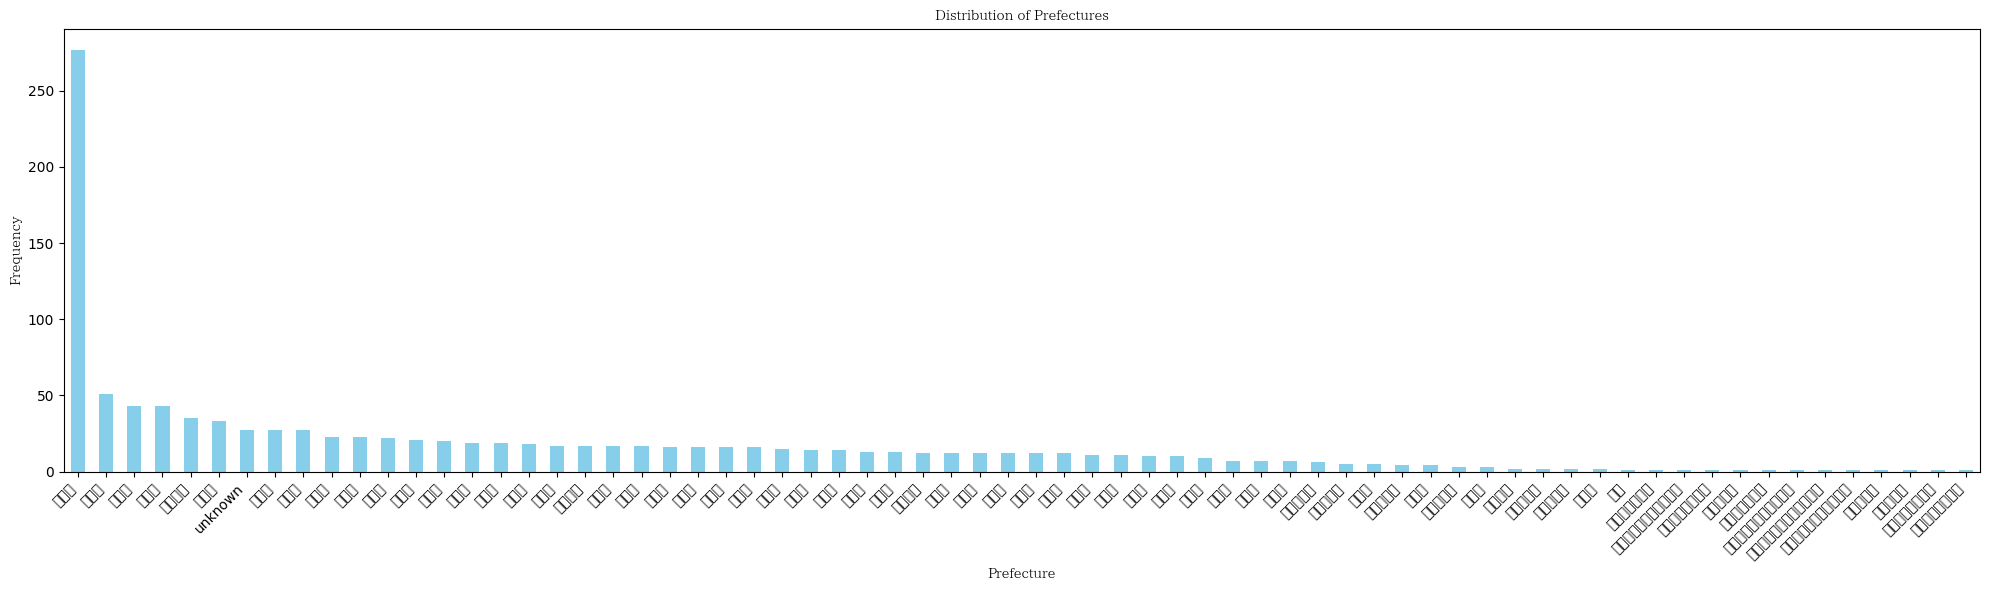

In [57]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

prefecture_counts = data['prefecture'].value_counts()

font_path = "/usr/share/fonts/truetype/fonts-japanese-mincho.ttf"  # Adjust path if needed
prop = font_manager.FontProperties(fname=font_path)

# Plotting the histogram again, now with proper font support
plt.figure(figsize=(20, 6))
prefecture_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Prefectures', fontproperties=prop)
plt.xlabel('Prefecture', fontproperties=prop)
plt.ylabel('Frequency', fontproperties=prop)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [64]:
translate = requests.get("https://libretranslate.com/?source=auto&target=en&q=東京")

In [65]:
with open("translate.html", "w", encoding='utf-8') as f:
    f.write(translate.text)